Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Load Libraries


In [339]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loads and read files

In [340]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')
#Reading gender file:
gender_file = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/gender_submission.csv')

In [341]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [342]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [344]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [345]:
gender_file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Check for null values and correct

In [346]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

Fill null values with mode

In [347]:
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

Graphical representation of target

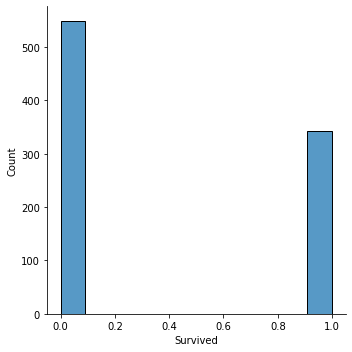

In [348]:
sns.displot(train.Survived)

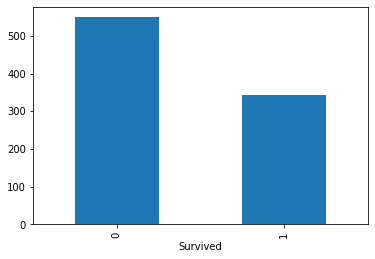

In [349]:
train.groupby('Survived').Survived.count().plot.bar(ylim=0)
plt.show()

Preprocess data

In [350]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

train.Sex = enc.fit_transform(train.Sex.values.reshape(-1,1))
train.Age=train.Age.astype(int)
train.Age = enc.fit_transform(train.Age.values.reshape(-1,1))
train.Ticket = enc.fit_transform(train.Ticket.values.reshape(-1,1))
train.Cabin = enc.fit_transform(train.Cabin.values.reshape(-1,1))
train.Fare=train.Fare.astype(int)
train.Fare = enc.fit_transform(train.Fare.values.reshape(-1,1))
train.Embarked = enc.fit_transform(train.Embarked.values.reshape(-1,1))

test.Sex = enc.fit_transform(test.Sex.values.reshape(-1,1))
test.Age=test.Age.astype(int)
test.Age = enc.fit_transform(test.Age.values.reshape(-1,1))
test.Ticket = enc.fit_transform(test.Ticket.values.reshape(-1,1))
test.Cabin = enc.fit_transform(test.Cabin.values.reshape(-1,1))
test.Fare=test.Fare.astype(int)
test.Fare = enc.fit_transform(test.Fare.values.reshape(-1,1))
test.Embarked = enc.fit_transform(test.Embarked.values.reshape(-1,1))

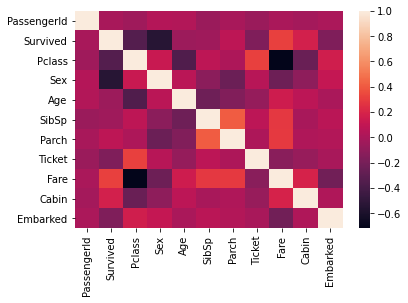

In [351]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap)

Set up X and y values

In [352]:
y = train.Survived
X = train.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
X.shape, y.shape,X_test.shape

((891, 7), (891,), (418, 7))

In [353]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,4.0,2.0
1,1,0.0,38.0,1,0,56.0,0.0
2,3,0.0,26.0,0,0,4.0,2.0
3,1,0.0,35.0,1,0,46.0,2.0
4,3,1.0,35.0,0,0,5.0,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,10.0,2.0
887,1,0.0,19.0,0,0,27.0,2.0
888,3,0.0,24.0,1,2,20.0,2.0
889,1,1.0,26.0,0,0,27.0,0.0


In [354]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [355]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,33.0,0,0,3.0,1.0
1,3,0.0,46.0,1,0,3.0,2.0
2,2,1.0,59.0,0,0,5.0,1.0
3,3,1.0,26.0,0,0,4.0,2.0
4,3,0.0,21.0,1,1,8.0,2.0
...,...,...,...,...,...,...,...
413,3,1.0,20.0,0,0,4.0,2.0
414,1,0.0,38.0,0,0,62.0,0.0
415,3,1.0,37.0,0,0,3.0,2.0
416,3,1.0,20.0,0,0,4.0,2.0


Split the training file for training and testing

In [356]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((801, 7), (90, 7), (801,), (90,))

Scaler

In [357]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

Count values in validation set

In [358]:
from collections import Counter

print(Counter(y_val))

Counter({0: 55, 1: 35})


Class weights

In [359]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 

Apply PCA

In [360]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [361]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.29232211, 0.24164432, 0.1484242 , 0.12056085, 0.09296233,
       0.07973927])

Select model

AdaBoostClassifier

In [362]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=1, class_weight=class_weights)).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.968789013732834


In [363]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.7888888888888889


In [364]:
print(Counter(y_pred))

Counter({0: 60, 1: 30})


In [365]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
387,1,1
642,0,0
782,0,1
142,1,1
222,0,0
...,...,...
68,1,0
272,1,1
197,0,0
116,0,0


Make predictions

In [366]:
predictions = model.predict(X_test)

In [367]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submit predictions

In [368]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Visualise PCA - X

In [369]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(891, 7)

In [370]:
np.mean(X),np.std(X)

(-7.974665945680137e-18, 1.0)

In [371]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6']

In [372]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6
0,0.827377,0.737695,-0.497896,0.432793,-0.473674,-0.770005,0.585954
1,-1.566107,-1.355574,0.724422,0.432793,-0.473674,1.522642,-1.942303
2,0.827377,-1.355574,-0.192316,-0.474545,-0.473674,-0.770005,0.585954
3,-1.566107,-1.355574,0.495238,0.432793,-0.473674,1.081748,0.585954
4,0.827377,0.737695,0.495238,-0.474545,-0.473674,-0.725916,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.115921,-0.474545,-0.473674,-0.505469,0.585954
887,-1.566107,-1.355574,-0.727080,-0.474545,-0.473674,0.244050,0.585954
888,0.827377,-1.355574,-0.345106,0.432793,2.008933,-0.064575,0.585954
889,-1.566107,0.737695,-0.192316,-0.474545,-0.473674,0.244050,-1.942303


In [373]:
from sklearn.decomposition import PCA

pca_titanic = PCA(n_components=2)
principalComponents_titanic = pca_titanic.fit_transform(X)

In [374]:
principal_titanic_Df = pd.DataFrame(data = principalComponents_titanic, columns = ['principal component 1', 'principal component 2'])
principal_titanic_Df

,principal component 1,principal component 2
0,-1.405051,0.531339
1,2.719243,-1.042709
2,-0.909048,0.316893
3,1.855810,-0.530483
4,-1.437658,-0.460996
...,...,...
886,-0.755576,-0.610308
887,0.924936,-0.357050
888,0.467985,2.085259
889,0.892502,-1.431132


In [375]:
print('Explained variation per principal component: {}'.format(pca_titanic.explained_variance_ratio_))

Explained variation per principal component: [0.29495862 0.24349003]


<Figure size 432x288 with 0 Axes>

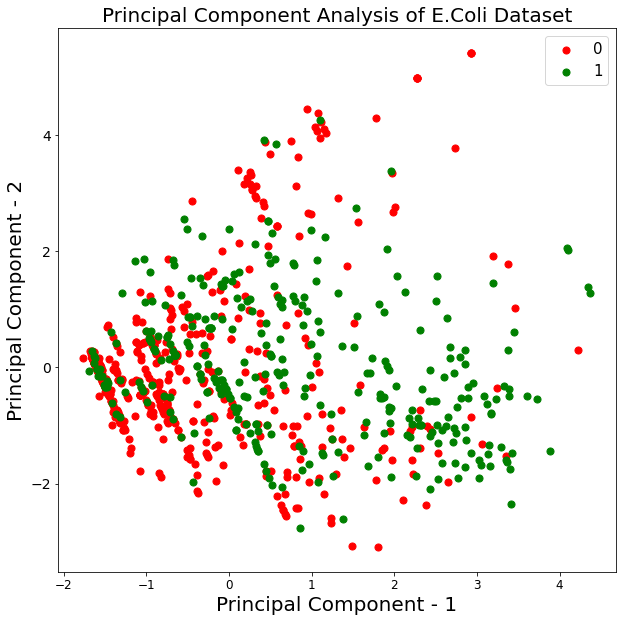

In [378]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of E.Coli Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(principal_titanic_Df.loc[indicesToKeep, 'principal component 1'], 
                principal_titanic_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})